# Rice Leaf Disease Detection Project

# Problem Statement

1. Prepare a complete data analysis report on the given dataset.
2. Create a model which can classify the three major attacking diseases of rice plant like 
blast,bacterial blight and brown spot.
3.Analyze various techniques like Data Augmentation, etc and create a report on that.


This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.
Classes:
        1.Leaf smut
        2.Brown spot
        3.Bacterial leaf blight

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import keras
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,MaxPool2D
from keras.callbacks import ModelCheckpoint   
from keras import tf2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [2]:
# splittind dataset into train ,test and validation using split-folders method

import splitfolders
splitfolders.ratio(r"C:\Users\Home\Downloads\PRCP-1001-RiceLeaf\Data",output="output", seed=42, ratio=(.7,0.2,0.1),group_prefix=None)

Copying files: 119 files [00:00, 317.32 files/s]


In [3]:
train_data=r"C:\Users\Home\Downloads\CPP Data PROJECT 1\Untitled Folder\output\train" # training data path
validation_data=r"C:\Users\Home\Downloads\CPP Data PROJECT 1\Untitled Folder\output\val" # validation data path
test_data=r"C:\Users\Home\Downloads\CPP Data PROJECT 1\Untitled Folder\output\test"# testing path

# Generating train and Validation images

In [4]:
# Generating batches of image data
train_datagenerator=ImageDataGenerator(
    rescale=(1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2)

train_generator = train_datagenerator.flow_from_directory(
    train_data,
    target_size=(180,180),
    batch_size=15,
    color_mode='rgb',
    class_mode='categorical',shuffle=True)


validation_datagenerator = ImageDataGenerator(rescale=(1./255))

validation_generator = validation_datagenerator.flow_from_directory(
    validation_data,
    target_size=(180,180),
    batch_size=15,
    color_mode='rgb',
    class_mode='categorical',shuffle=True)


Found 83 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


# Visualizing training images

In [5]:
## Plotting train images
def plots(ims, figsize=(20,20), rows=5, interp = False, title = None):
    f = plt.figure(figsize = figsize)
    cols = len(ims) // rows if len(ims) % 2==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)], fontsize=16)
        plt.imshow(ims[i])
        
# list of classes
class_names = ['Bacterial leaf blight','Brown spot', 'Leaf smut']

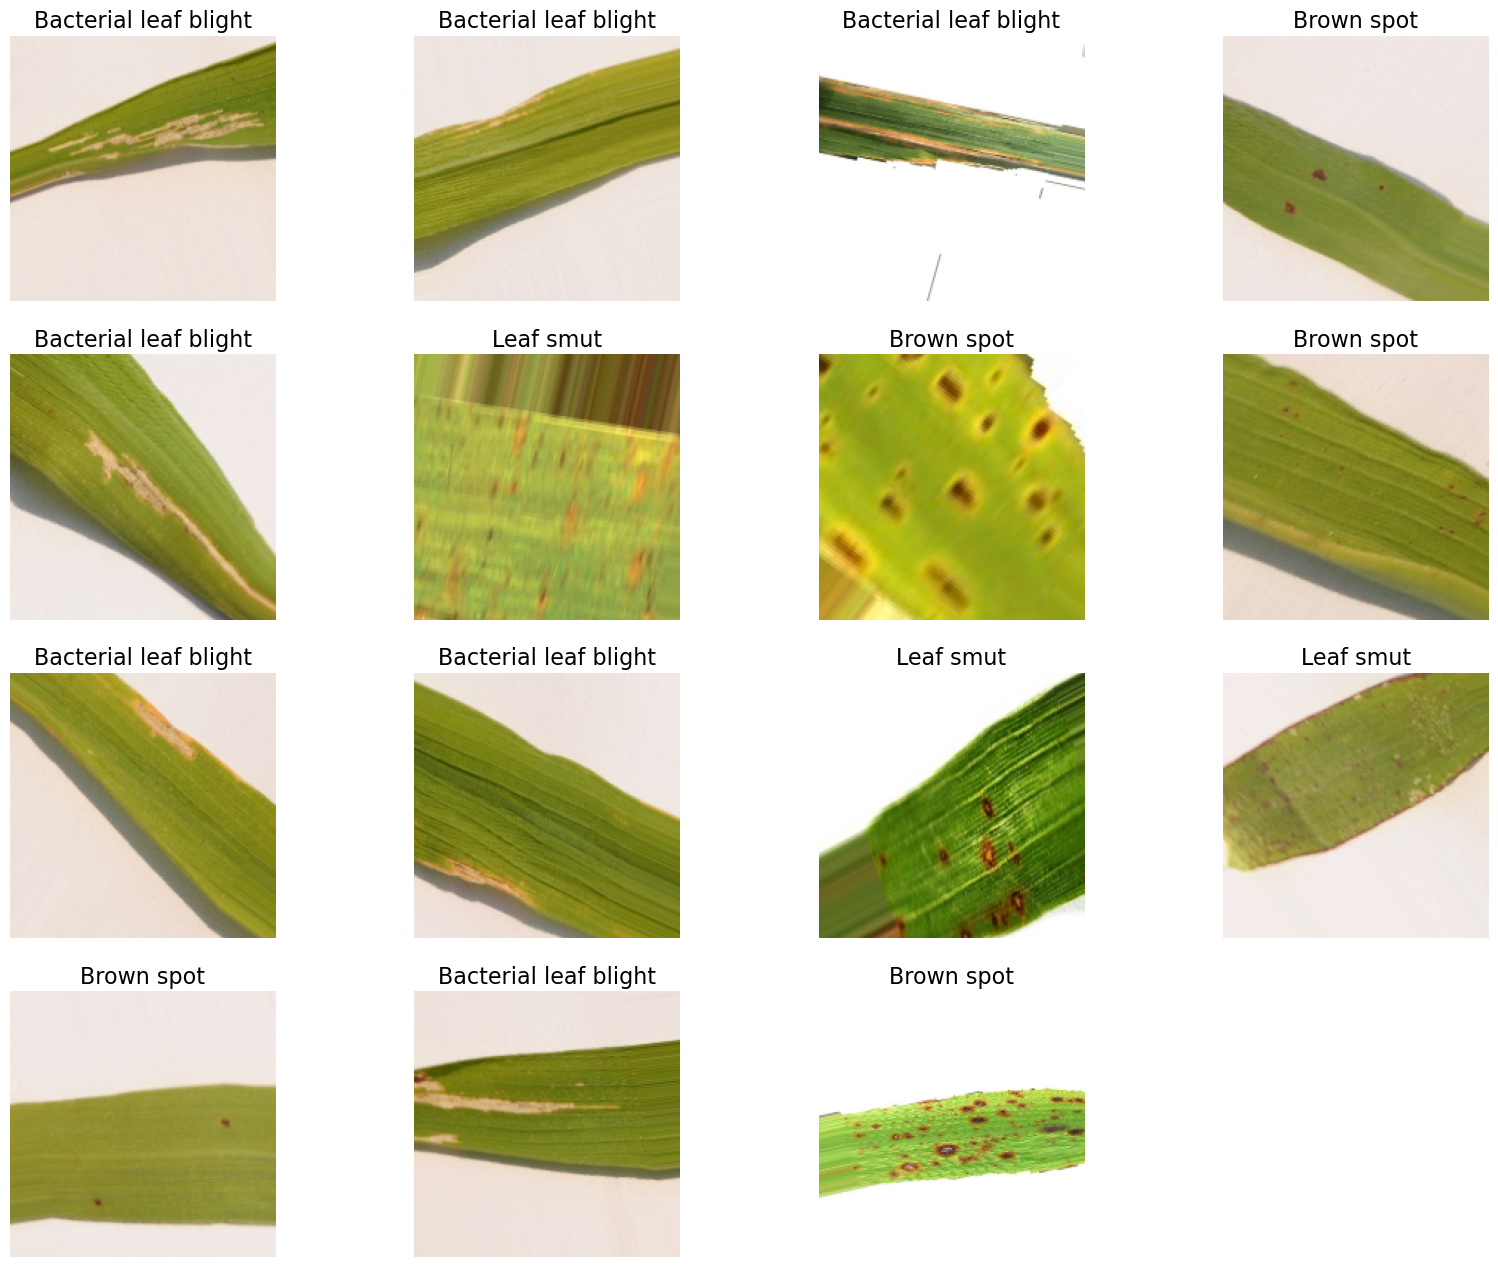

In [6]:
# plotting images
imgs, labels = next(train_generator)
plots(imgs, title = labels)

# CNN MODEL CREATION

In [7]:
from keras.models import Sequential

In [8]:
model = Sequential()



model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(180,180,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=3))


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(180,180,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=3))


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(180,180,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=3))


model.add(Flatten())

model.add(Dense(128,activation='relu')) # input node
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax')) #output node

In [9]:
# getting summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

# Compiling the model

In [10]:
## Compiling the model
from tensorflow.keras import optimizers
model.compile(
loss = 'CategoricalCrossentropy',
optimizer = 'rmsprop',
metrics = ['accuracy'])

# Fitting the model

In [11]:
history = model.fit_generator(train_generator,
    epochs=120, validation_data = validation_generator,shuffle=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_5776\1199731761.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/120
6/6 [==============================] - 10s 2s/step - loss: 1.1621 - accuracy: 0.3373 - val_loss: 1.1169 - val_accuracy: 0.3043
Epoch 2/120
6/6 [==============================] - 7s 1s/step - loss: 1.1147 - accuracy: 0.3253 - val_loss: 1.0960 - val_accuracy: 0.3478
Epoch 3/120
6/6 [==============================] - 7s 1s/step - loss: 1.1102 - accuracy: 0.3133 - val_loss: 1.0940 - val_accuracy: 0.4348
Epoch 4/120
6/6 [==============================] - 7s 1s/step - loss: 1.0998 - accuracy: 0.3614 - val_loss: 1.0849 - val_accuracy: 0.4348
Epoch 5/120
6/6 [==============================] - 7s 1s/step - loss: 1.0974 - accuracy: 0.2892 - val_loss: 1.0857 - val_accuracy: 0.5217
Epoch 6/120
6/6 [==============================] - 7s 1s/step - loss: 1.1050 - accuracy: 0.3253 - val_loss: 1.0848 - val_accuracy: 0.3478
Epoch 7/120
6/6 [==============================] - 7s 1s/step - loss: 1.1076 - accuracy: 0.3012 - val_loss: 1.1050 - val_accuracy: 0.3478
Epoch 8/120
6/6 [================

In [13]:
pwd

'C:\\Users\\Home\\Downloads\\CPP Data PROJECT 1\\Untitled Folder'

In [14]:
## Saving the model
model.save('C:\\Users\\Home\\Downloads\\CPP Data PROJECT 1\\Untitled Folder')

INFO:tensorflow:Assets written to: C:\Users\Home\Downloads\CPP Data PROJECT 1\Untitled Folder\assets


INFO:tensorflow:Assets written to: C:\Users\Home\Downloads\CPP Data PROJECT 1\Untitled Folder\assets


# Plotting training,validation accuracy and loss.

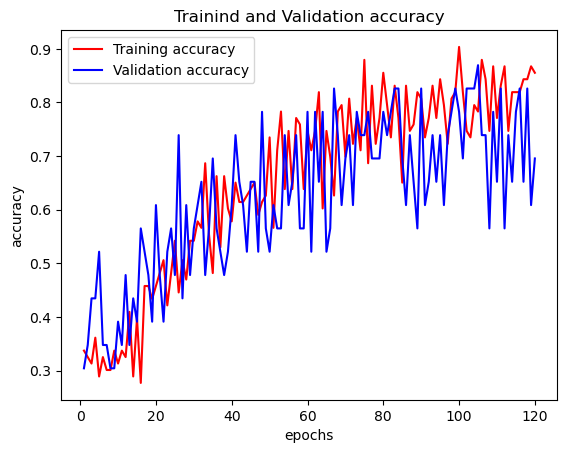

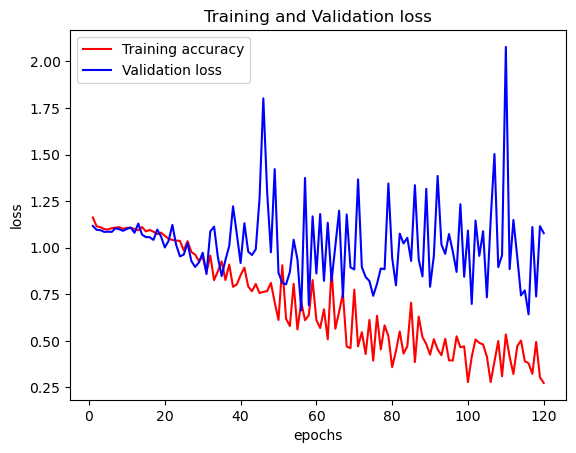

In [15]:
## Plotting training, Accuracy, Validation & loss
## plotting training accuracy & validation accuracy
## plotting training loss & Validation loss 
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy,"r", label = "Training accuracy")
plt.plot(epochs, val_accuracy, "b", label = "Validation accuracy")
plt.title("Trainind and Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label = "Training accuracy")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [16]:
## summary of the model
model = tf.keras.models.load_model('C:\\Users\\Home\\Downloads\\CPP Data PROJECT 1\\Untitled Folder')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

# Evaluation of test model

In [17]:
## Evaluation of test model
test_datagenerator = ImageDataGenerator(rescale=(1./255))
test_generator = test_datagenerator.flow_from_directory(
    
    test_data,
    target_size=(180,180),
    
    batch_size = 16,
    color_mode = "rgb",
    class_mode = "categorical")

Found 13 images belonging to 3 classes.


In [18]:
# model evaluation
model.evaluate(test_generator)

1/1 [==============================] - 1s 929ms/step - loss: 0.5880 - accuracy: 0.9231


[0.5880215764045715, 0.9230769276618958]

# Here is the loss is 58% and the accuracy of the model is 92%

1/1 [==============================] - 0s 50ms/step


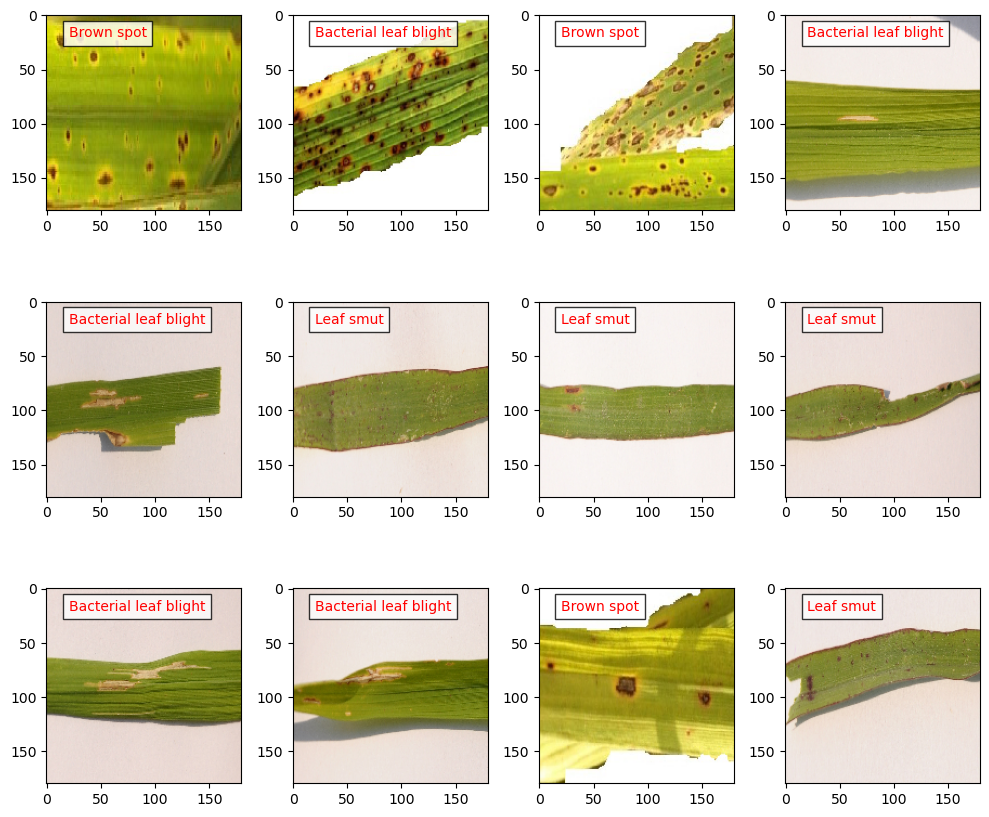

In [19]:
## visualise the prediction of model
imgs, labels= next(test_generator)
fig = plt.figure(figsize=(10,10))
columns = 4
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i], axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,20,class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])
    plt.tight_layout()

In [20]:
score = model.evaluate(train_generator)
accuracy = 100*score[1]
accuracy

6/6 [==============================] - 5s 780ms/step - loss: 0.1968 - accuracy: 0.9518


95.18072009086609

In [21]:
score = model.evaluate(validation_generator)
accuracy = 100*score[1]
accuracy

2/2 [==============================] - 1s 361ms/step - loss: 1.0781 - accuracy: 0.6957


69.5652186870575

In [22]:
score = model.evaluate(test_generator)
accuracy = 100*score[1]
accuracy

1/1 [==============================] - 1s 715ms/step - loss: 0.5880 - accuracy: 0.9231


92.30769276618958

# Conclusion:

## CNN model with augmentation has generated test accuracy score = 92%.we have observed that when epochs are increased accuracy also increases.

## Algorithm has visually differentiated three classes with their names.